# _**Employee Attrition**_ #

1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

2. EDA

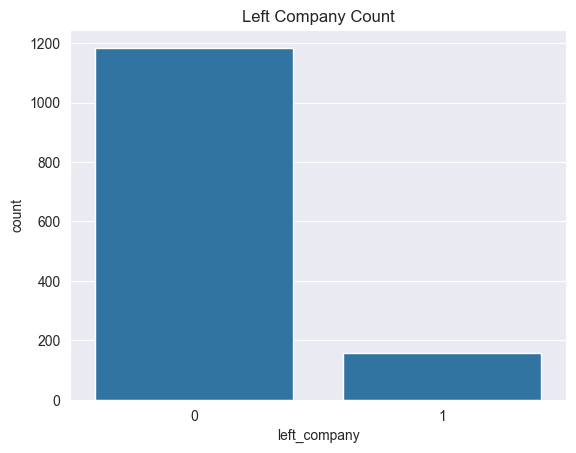

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.drop(columns=['ID'], inplace=True)
test_ids = test['ID']
test.drop(columns=['ID'], inplace=True)

label_cols = train.select_dtypes(include=['object']).columns.tolist()
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('left_company')


for col in label_cols:
    labelencoder = LabelEncoder()
    train[col] = labelencoder.fit_transform(train[col])
    test[col] = labelencoder.transform(test[col])
    
    
scaler = StandardScaler()
x = train.drop(['left_company'], axis=1)
y = train['left_company']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

sns.countplot(x='left_company', data=train)
plt.title("Left Company Count")
plt.show()

3. Baseline Model: Logistic Regression

Logistic Regression(no class weight
F1 score: 0.21621621621621623
Recall: 0.13793103448275862
Precision: 0.5
roc_auc: 0.8301724137931035


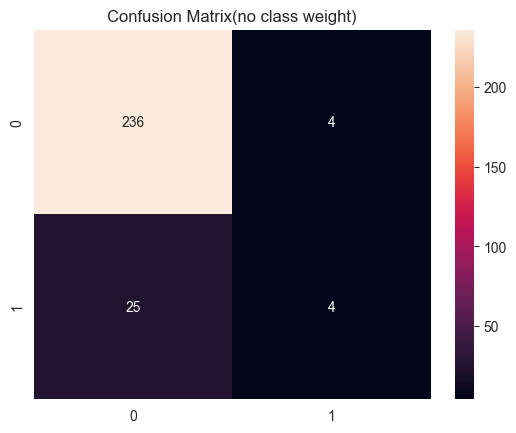

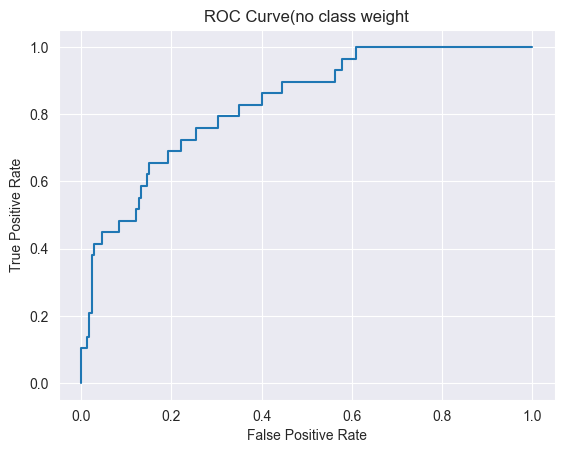

Logistic Regression(balanced)
F1 score: 0.39622641509433965
Recall: 0.7241379310344828
Precision: 0.2727272727272727
roc_auc: 0.8317528735632185


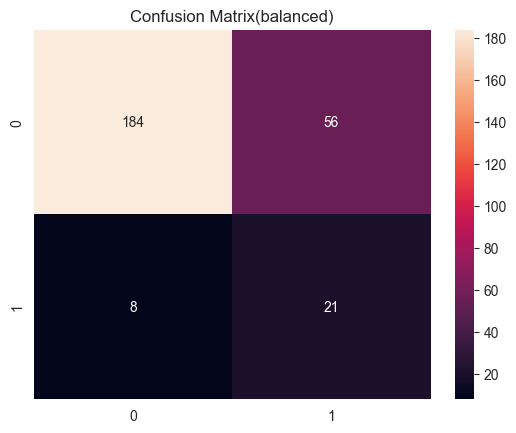

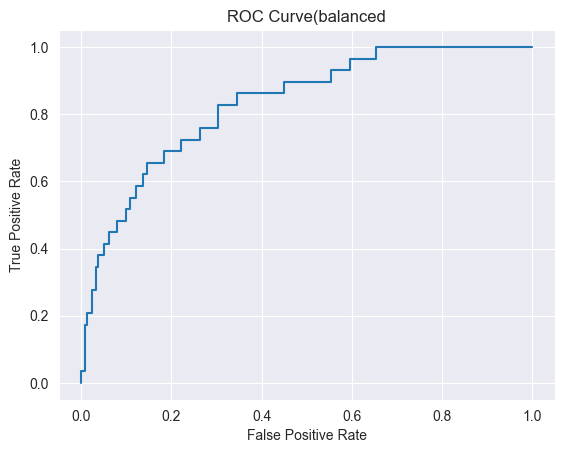

In [3]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('Logistic Regression(no class weight)')
print(f'F1 score: {f1_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'roc_auc: {roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix(no class weight)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(no class weight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


#--------------------------------------------------------------------------------


lr_bal = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_bal.fit(x_train, y_train)
y_pred_bal = lr_bal.predict(x_test)


print('Logistic Regression(balanced)')
print(f'F1 score: {f1_score(y_test, y_pred_bal)}')
print(f'Recall: {recall_score(y_test, y_pred_bal)}')
print(f'Precision: {precision_score(y_test, y_pred_bal)}')
print(f'roc_auc: {roc_auc_score(y_test, lr_bal.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_bal), annot=True, fmt='d')
plt.title('Confusion Matrix(balanced)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, lr_bal.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(balanced')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

4: Advanced Models

4.1: SVM(kernel = linear)

SVM Linear Classifier
F1 score: 0.38
Recall: 0.6551724137931034
Precision: 0.2676056338028169
roc_auc score: 0.8294540229885057


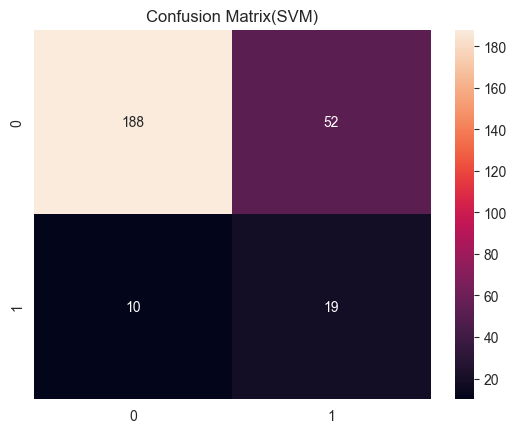

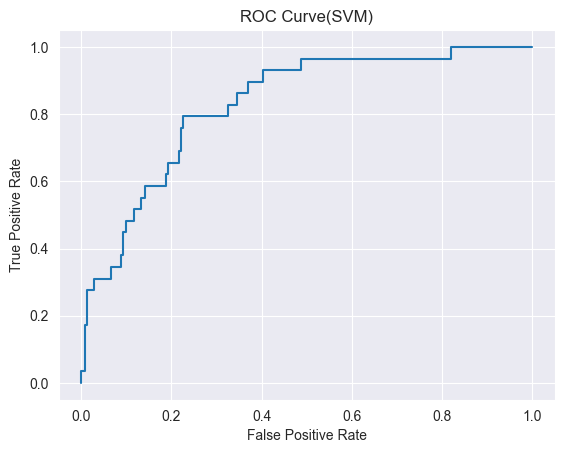

In [4]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)


svm_linear = SVC(kernel='linear', class_weight='balanced', probability=True)
svm_linear.fit(x_res, y_res)
y_pred_svm_linear = svm_linear.predict(x_test)

print('SVM Linear Classifier')
print(f'F1 score: {f1_score(y_test, y_pred_svm_linear)}')
print(f'Recall: {recall_score(y_test, y_pred_svm_linear)}')
print(f'Precision: {precision_score(y_test, y_pred_svm_linear)}')
print(f'roc_auc score: {roc_auc_score(y_test, svm_linear.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_svm_linear), annot=True, fmt='d')
plt.title('Confusion Matrix(SVM)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, svm_linear.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

4.2: SVM(Kernel : RBF)

SVM RBF Classifier
f1 : 0.3793103448275862
recall: 0.3793103448275862
precision: 0.3793103448275862
roc_auc: 0.7668103448275863


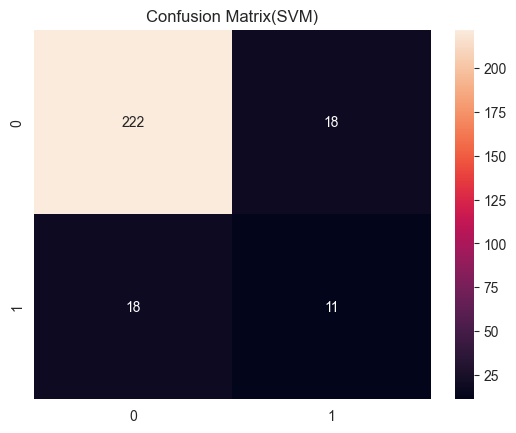

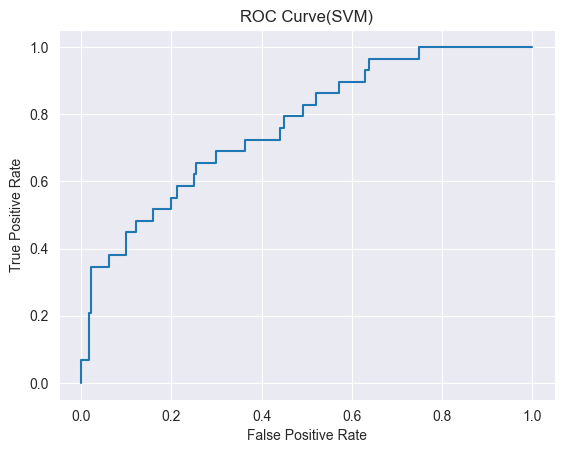

In [5]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(x_res, y_res)
y_pred_svm_rbf = svm_rbf.predict(x_test)

print('SVM RBF Classifier')
print(f'f1 : {f1_score(y_test, y_pred_svm_rbf)}')
print(f'recall: {recall_score(y_test, y_pred_svm_rbf)}')
print(f'precision: {precision_score(y_test, y_pred_svm_rbf)}')
print(f'roc_auc: {roc_auc_score(y_test, svm_rbf.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_svm_rbf), annot=True, fmt='d')
plt.title('Confusion Matrix(SVM)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, svm_rbf.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

4.3.1: XGBoost

XGBoost Classifier
f1 : 0.4
recall: 0.3793103448275862
precision: 0.4230769230769231
roc_auc: 0.8191091954022989


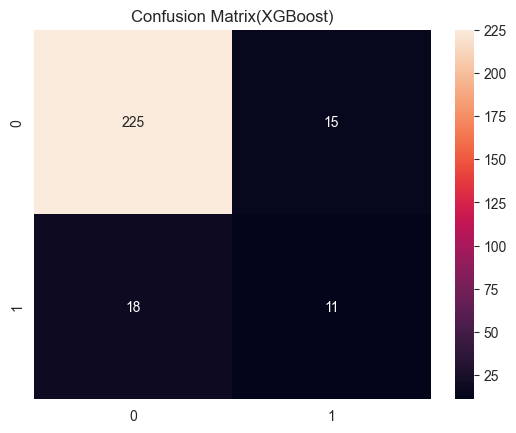

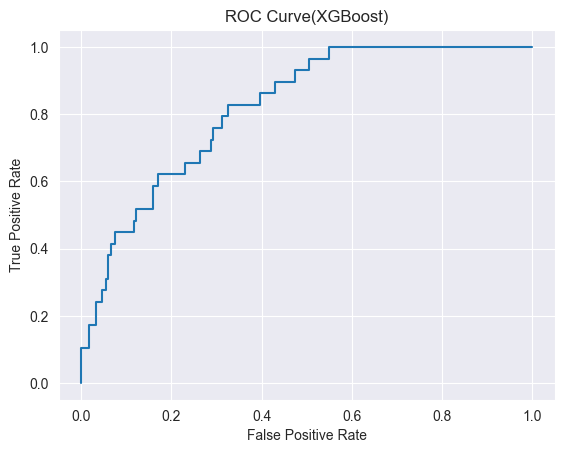

In [6]:
xgb = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), eval_metric='auc')
xgb.fit(x_res, y_res)
y_pred_xgb = xgb.predict(x_test)

print('XGBoost Classifier')
print(f'f1 : {f1_score(y_test, y_pred_xgb)}')
print(f'recall: {recall_score(y_test, y_pred_xgb)}')
print(f'precision: {precision_score(y_test, y_pred_xgb)}')
print(f'roc_auc: {roc_auc_score(y_test, xgb.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.title('Confusion Matrix(XGBoost)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(XGBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

4.3.2: Random Forest

Random Forest Classifier
f1: 0.2631578947368421
recall: 0.1724137931034483
precision: 0.5555555555555556
roc_auc: 0.8349856321839081


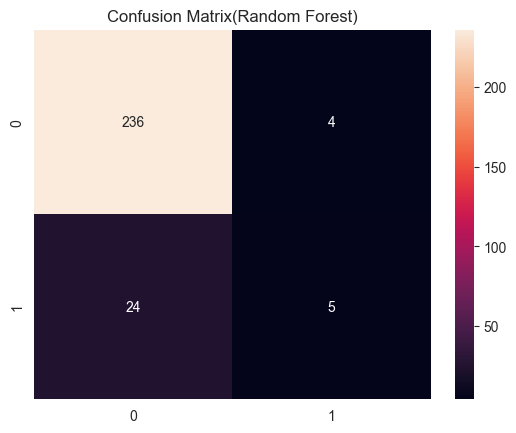

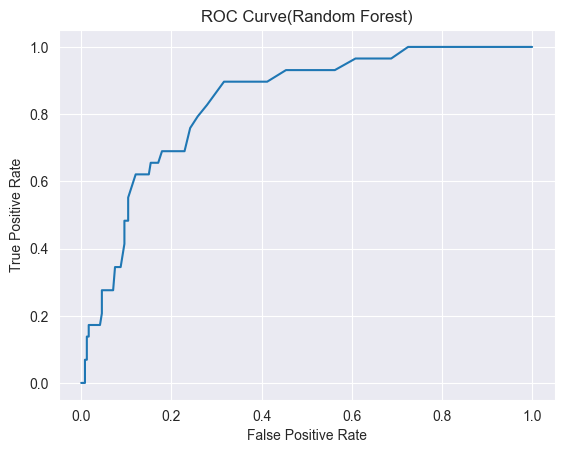

In [7]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100)
rf.fit(x_res, y_res)
y_pred_rf = rf.predict(x_test)

print('Random Forest Classifier')
print(f'f1: {f1_score(y_test, y_pred_rf)}')
print(f'recall: {recall_score(y_test, y_pred_rf)}')
print(f'precision: {precision_score(y_test, y_pred_rf)}')
print(f'roc_auc: {roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])}')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Confusion Matrix(Random Forest)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

4.4: K-Nearest Neighbors

K-Nearest Neighbors
best params: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
f1: 0.2127659574468085
recall: 0.1724137931034483
precision: 0.2777777777777778
roc_auc: 0.6052442528735632


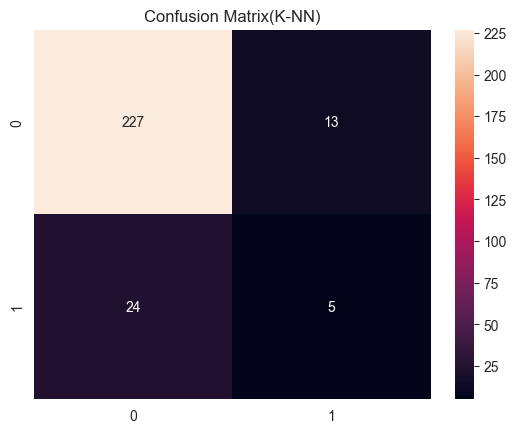

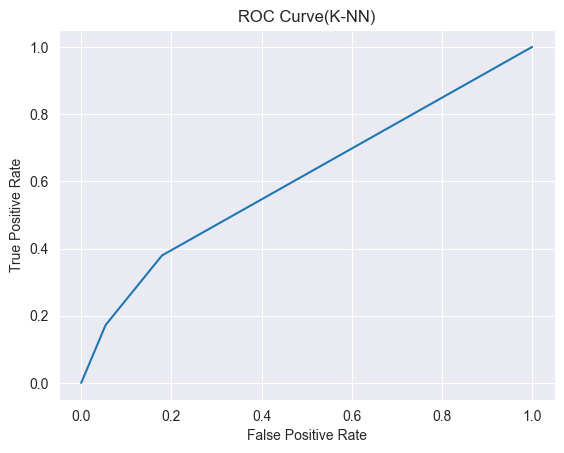

In [8]:
knn = KNeighborsClassifier()

param_gird = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

gird_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_gird,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

gird_knn.fit(x_res, y_res)
y_pred_knn = gird_knn.predict(x_test)

print('K-Nearest Neighbors')
print(f'best params: {gird_knn.best_params_}')
print(f'f1: {f1_score(y_test, y_pred_knn)}')
print(f'recall: {recall_score(y_test, y_pred_knn)}')
print(f'precision: {precision_score(y_test, y_pred_knn)}')
print(f'roc_auc: {roc_auc_score(y_test, gird_knn.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title('Confusion Matrix(K-NN)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, gird_knn.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(K-NN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

5.1 Handling Imbalanced Data(SMOTE)

XGBoost with SMOTE Classifier
f1: 0.4
recall: 0.3793103448275862
precision: 0.4230769230769231
roc_auc: 0.8191091954022989


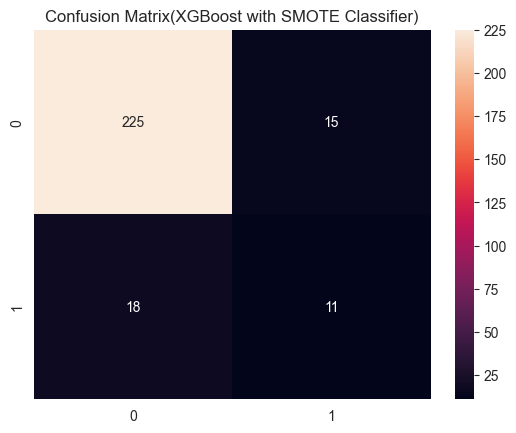

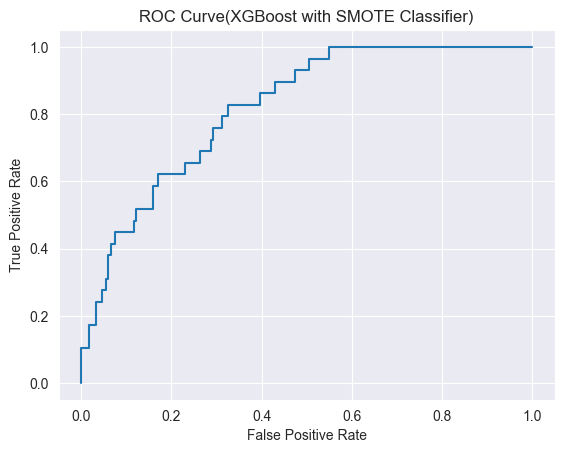

In [9]:
smote = SMOTE(random_state=42)
x_sm, y_sm = smote.fit_resample(x_train, y_train)

xgb_sm = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), random_state=42)
xgb_sm.fit(x_sm, y_sm)
y_pred_xgb_sm = xgb_sm.predict(x_test)

print('XGBoost with SMOTE Classifier')
print(f'f1: {f1_score(y_test, y_pred_xgb_sm)}')
print(f'recall: {recall_score(y_test, y_pred_xgb_sm)}')
print(f'precision: {precision_score(y_test, y_pred_xgb_sm)}')
print(f'roc_auc: {roc_auc_score(y_test, xgb_sm.predict_proba(x_test)[:, 1])}')

sns.heatmap(confusion_matrix(y_test, y_pred_xgb_sm), annot=True, fmt='d')
plt.title('Confusion Matrix(XGBoost with SMOTE Classifier)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, xgb_sm.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(XGBoost with SMOTE Classifier)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

5.2 Handling Imbalanced Data : Under Sampling

Random Forest Classifier
f1: 0.24786324786324787
recall: 1.0
precision: 0.14146341463414633
roc_auc: 0.8954022988505747


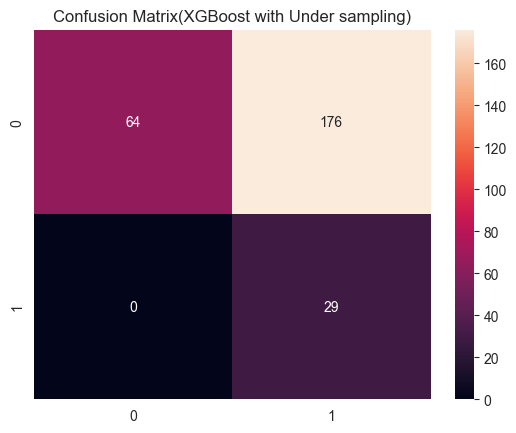

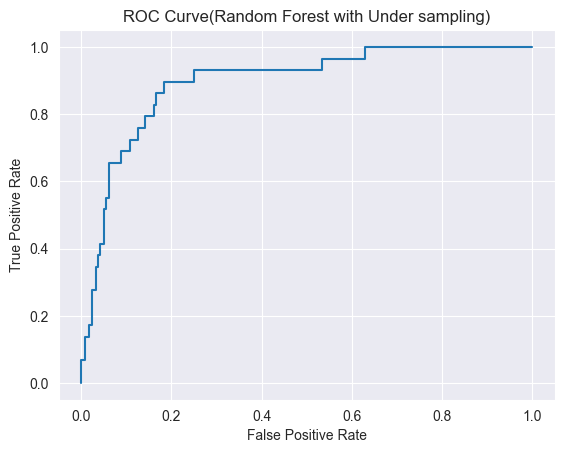

In [10]:
train_majority = train[train.left_company == 0]
train_minority = train[train.left_company == 1]

train_majority_downsampled = train_majority.sample(n=len(train_minority), random_state=42)
train_downsampled = pd.concat([train_majority_downsampled, train_minority])


x_down = pd.DataFrame(scaler.fit_transform(train_downsampled.drop(columns='left_company')), columns=x.columns)
y_down = train_downsampled['left_company']


xgb_under = XGBClassifier(random_state=42)
xgb_under.fit(x_down, y_down)
y_pred_xgb_under = xgb_under.predict(x_test)

print('Random Forest Classifier')
print(f'f1: {f1_score(y_test, y_pred_xgb_under)}')
print(f'recall: {recall_score(y_test, y_pred_xgb_under)}')
print(f'precision: {precision_score(y_test, y_pred_xgb_under)}')
print(f'roc_auc: {roc_auc_score(y_test, xgb_under.predict_proba(x_test)[:, 1])}')


sns.heatmap(confusion_matrix(y_test, y_pred_xgb_under), annot=True, fmt='d')
plt.title('Confusion Matrix(XGBoost with Under sampling)')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, xgb_under.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve(Random Forest with Under sampling)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

6. Stacking Ensemble

In [11]:
stack = StackingClassifier(
    estimators=[
        ('svm', svm_linear),
        ('xgb', xgb)
    ],
    final_estimator = LogisticRegression(random_state=42)
)

stack.fit(x_res, y_res)
y_pred_stack = stack.predict(x_test)

print('Stacking Classifier')
print(f'f1: {f1_score(y_test, y_pred_stack)}')
print(f'recall: {recall_score(y_test, y_pred_stack)}')
print(f'precision: {precision_score(y_test, y_pred_stack)}')
print(f'roc_auc: {roc_auc_score(y_test, stack.predict_proba(x_test)[:, 1])}')

Stacking Classifier
f1: 0.4
recall: 0.3793103448275862
precision: 0.4230769230769231
roc_auc: 0.8277298850574712


7. Fianl Models

In [12]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_test_final = scaler.transform(test)

7.1: SVM(RBF)

In [13]:
x_final_sm, y_final_sm = SMOTE(random_state=42).fit_resample(x, y)

svm_final_model = SVC(kernel='rbf',class_weight='balanced', random_state=42)
svm_final_model.fit(x_final_sm, y_final_sm)
svm_pred = svm_final_model.predict(x_test_final)

7.2: XGBoost

In [14]:
xgb_final_model = XGBClassifier(eval_metric='auc', random_state=42)
xgb_final_model.fit(x_final_sm, y_final_sm)
xgb_pred = xgb_final_model.predict(x_test_final)

7.3: Random Forest

In [15]:
rf_final_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_final_model.fit(x_down, y_down)
rf_pred = rf_final_model.predict(x_test_final)

C:\Users\victus\Desktop\my Project\Python\MachineLearningCourse\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


8: submission file

In [16]:
pd.DataFrame({
    'ID': test_ids,
    'left_company': svm_pred
}).to_csv('submission.csv', index=False)